# Complex Linear Regression

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.style.use('ggplot')

#### Mulitple Feature Linear Regression

Multiple linear regression models relationships with linear equations involving multiple independent variables.

A simplified multi feature linear function

```math
Y=\beta _{0}+\beta _{1}X_{1} +\beta_{2}X_{2}+\ldots+\beta_{n}X_{n}
```

<span style="color : red">Band 6 students should be able to 'recall' this function and have a high level understanding of it in Multi Feature Linear Regression.</span>

| Symbol | |
| --- | --- |
| $y$ | Predicted value |
| $b_{1}$, $b_{2}$, ..., $b_{n}$ | The weight or coefficients for each feature |
| $X_{1}$, $X_{2}$, ..., $X{n}$ | Features |
| $b_{0}$ | The bias or y-intercept when all independent variables are zero |




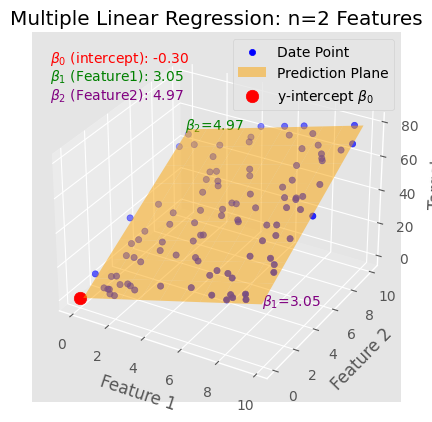

In [2]:
n_samples = 100
X1 = np.random.rand(n_samples) * 10 
X2 = np.random.rand(n_samples) * 10 
y = 3 * X1 + 5 * X2 + np.random.randn(n_samples) * 2  
data = pd.DataFrame({'Feature1': X1, 'Feature2': X2, 'Target': y})
# Training a Linear Regression Model
model = LinearRegression()
X = data[['Feature1', 'Feature2']]
model.fit(X, y)
intercept = model.intercept_
coefficients = model.coef_
# Creating a 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Feature1'], data['Feature2'], data['Target'], color='blue', label="Date Point")
x1_range = np.linspace(data['Feature1'].min(), data['Feature1'].max(), 10)
x2_range = np.linspace(data['Feature2'].min(), data['Feature2'].max(), 10)
X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)
y_pred = intercept + coefficients[0] * X1_grid + coefficients[1] * X2_grid
math = r"$\beta_0$"
ax.plot_surface(X1_grid, X2_grid, y_pred, color='orange', alpha=0.5, label="Prediction Plane")
ax.scatter(0, 0, intercept, color='red', s=80, label=f'y-intercept {math}')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.text(
    x1_range[-1], 0, intercept + coefficients[0] * x1_range[-1],
    f"$\\beta_1$={coefficients[0]:.2f}", color='purple', fontsize=10
)
ax.text(
    0, x2_range[-1], intercept + coefficients[1] * x2_range[-1],
    f"$\\beta_2$={coefficients[1]:.2f}", color='green', fontsize=10
)
ax.text2D(0.05, 0.92, f"$\\beta_0$ (intercept): {intercept:.2f}", transform=ax.transAxes, color='red')
ax.text2D(0.05, 0.87, f"$\\beta_1$ (Feature1): {coefficients[0]:.2f}", transform=ax.transAxes, color='green')
ax.text2D(0.05, 0.82, f"$\\beta_2$ (Feature2): {coefficients[1]:.2f}", transform=ax.transAxes, color='purple')
ax.set_title("Multiple Linear Regression: n=2 Features")
plt.legend()
plt.show()

#### Polynomial Linear Regression

Polynomial regression extends multiple linear regression by modeling relationships between variables using polynomial terms (e.g., x², x³, etc.). Essentially, polynomial regression adds non-linearity to the model by including powers of the independent variable(s). 

A simplified polynomial linear function

```math
Y=\beta _{0}+\beta _{1}X^{1} +\beta_{2}X^{2}+\ldots+\beta_{n}X^{n}
```

<span style="color : red">Students are not expected to recall or be able to 
calculate this function, but should be able to explain how the polynomial expression extends the simple Linear Regression function.</span>

| Symbol | |
| --- | --- |
| y | Predicted value |
| $\beta _{1}$, $\beta _{2}$, ..., $\beta _{n}$ | Slope of coefficients of the linear expression, for each polynomial degree |
| $X$, $X^{2}$, ..., $X^{n}$ | Features or polynomial terms to the power of $^{n}$ |
| $\beta _{0}$ | y-intercept  when 'x' is zero; where the regression line crosses the y-axis |
| $n$ | Degree's of polynomial |



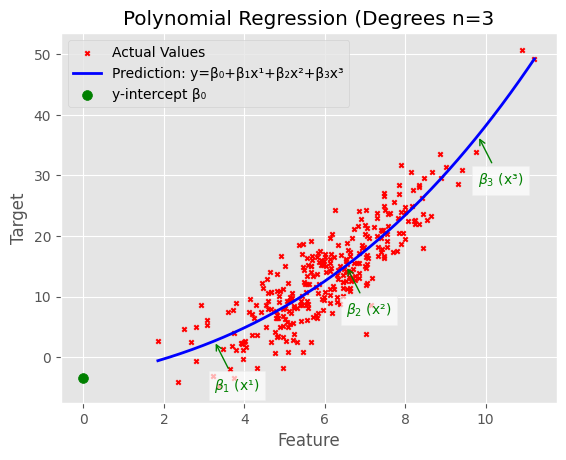

In [5]:
# Polynomial Linear Relationship
n = 300 # Sample
Beta = [2, -.2, 0.4]  # 3 degrees: β₀, β₁, β₂
e = np.random.normal(-3, 4, n)
X = (2 - 3 * np.random.normal(0, 0.5, n)) + 4
y = 0
for i in range(len(Beta)):
    y += Beta[i] * X**i
y += e

plt.xlabel("Feature")
plt.ylabel("Target")
plt.scatter(X, y, s=10, marker='x', c='r', label='Actual Values')

# Fit a 2nd degree polynomial (degree=2)
coeffs = np.polyfit(X, y, 3)
X_fit = np.linspace(X.min(), X.max(), 300)
y_fit = np.polyval(coeffs, X_fit)
plt.plot(X_fit, y_fit, color='blue', linewidth=2, label='Prediction: y=β₀+β₁x¹+β₂x²+β₃x³')

y_intercept = np.polyval(coeffs, 0)
plt.scatter(0, y_intercept, color='green', s=50, zorder=5, label='y-intercept β₀')

# Labels for β₀, β₁, β₂
coeff_labels = [
    f"$β_1$ (x¹)",
    f"$β_2$ (x²)",
    f"$β_3$ (x³)"
]

x_annotate = [
    X.min() + 0.15 * (X.max() - X.min()),
    X.min() + 0.5 * (X.max() - X.min()),
    X.min() + 0.85 * (X.max() - X.min())
]
y_annotate = [np.polyval(coeffs, x) for x in x_annotate]

# Move the annotation labels below the plot line by subtracting from y
for x, y_val, label in zip(x_annotate, y_annotate, coeff_labels):
    plt.annotate(
        label,
        xy=(x, y_val),
        xytext=(x, y_val - 8),  # Move label below the curve
        arrowprops=dict(arrowstyle="->", color='green', lw=1),
        fontsize=10,
        color='green',
        bbox=dict(facecolor='white', alpha=0.7)
    )

plt.title("Polynomial Regression (Degrees n=3")
plt.legend()
plt.show()